# Checking Ranges of values for MNIST
### ('min is: ', -0.5599677521993149)
### ('max is: ', 0.494407323993612)

In [40]:
from __future__ import division
import numpy as np
import os
import glob

params_dir = './saved_models/las-mnist-cnn-100'
params = np.empty(shape = (0,))
min_f = float('inf')
max_f = float('-inf')

files = glob.glob(params_dir + '/model*.npz')
files = sorted(files)
for f_file in files:    
    with np.load(f_file) as f:
          # param_values = [f['arr_%d' % i] for i in range(len(f.files))]
        for i in range(len(f.files)):
            params = np.append(params,f['arr_%d' % i].flatten())
            params_min = np.min(params)
            params_max = np.max(params)
        if min_f > params_min:
                min_f = params_min
        if max_f < params_max:
                max_f = params_max
        prams = np.empty(shape = (0,))

print ("min is: ", params_min)
print ("max is: ", params_max)

('min is: ', -0.5599677521993149)
('max is: ', 0.494407323993612)


# Adding noise to weights

In [123]:
from __future__ import division
import os
import glob
import shutil
import multiprocessing
import numpy as np

NOISE_RATIO = '0.005'    # 0.9, 0.5, 0.2, 0.1, 0.05, 0.005
n_r = float(NOISE_RATIO)
STANDARD_DEV = '0.005'   # 0.0005, 0.005, 0.05, 0.5
sd = float(STANDARD_DEV)

def copytree(src, dst, symlinks=False, ignore=None):
    for item in os.listdir(src):
        s = os.path.join(src, item)
        d = os.path.join(dst, item)
        if os.path.isdir(s):
            shutil.copytree(s, d, symlinks, ignore)
        else:
            shutil.copy2(s, d)

def add_noise(filename = None, dest_dir = None):
    if filename is None or dest_dir is None:
        print "Error no file name is specified"
        exit(1)
    with np.load(filename) as f:
        params = dict(f)
    
    modified_params = dict()
    
    #print (params['arr_0'].shape)
    for k in params.keys():
        pislook = np.array(params[k])
        #print type(pislook)
        for x in np.nditer(pislook, op_flags=['readwrite']):
            if (np.random.uniform(0.0,1.0)) < n_r:
                noise = np.random.normal(0.0,sd)
                x[...] = x + noise
        modified_params[k] = pislook

    #total_equal = 0
    #total_not_equal = 0
    #for k in params.keys():
    #    total_equal = total_equal + np.sum(params[k] == modified_params[k])
    #    total_not_equal = total_not_equal + np.sum(params[k] != modified_params[k])
    #print (total_equal, total_not_equal)
    
    np.savez(dest_dir + filename[10:-4]+'-copy'+filename[-4:],**modified_params)
    
    #with np.load(filename[:-4]+'-copy'+filename[-4:]) as f:
    #    saved_params = dict(f)
    #total_equal = 0
    #total_not_equal = 0
    #for k in saved_params.keys():
    #    total_equal = total_equal + np.sum(saved_params[k] == modified_params[k])
    #    total_not_equal = total_not_equal + np.sum(saved_params[k] != modified_params[k])
    #print (total_equal, total_not_equal)
    
    
def model_params(dir=None):
    if dir is None:
        print "Error no directory is specified"
        exit(1)
    if os.path.exists('/tmp/zknw/'):
        shutil.rmtree('/tmp/zknw/')
    
    dest_dir = 'saved_models/las-mnist-100-' + NOISE_RATIO + '-' + STANDARD_DEV + '/'
    
    if os.path.exists(dest_dir):
        shutil.rmtree(dest_dir)
    
    os.mkdir('/tmp/zknw/')
    os.mkdir(dest_dir)
    
    copytree(dir,'/tmp/zknw/')
    files = glob.glob('/tmp/zknw/'+"model*.npz")
    files = sorted(files)
    cnt = 0
    procs = []
    for file_name in files:
        #if cnt < 1:
        if cnt < len(files):
            #proc = multiprocessing.Process(target = h5py_visit_file, args = (file_name,))
            #procs.append(proc)
            add_noise(file_name,dest_dir)
        else:
            break
        cnt = cnt + 1
    
    #for i in range(len(procs)):
     #   procs[i].start()
    
   # for i in range(len(procs)):
    #    procs[i].join()
model_params('./saved_models/las-mnist-cnn-100')

# Graphs for MNIST

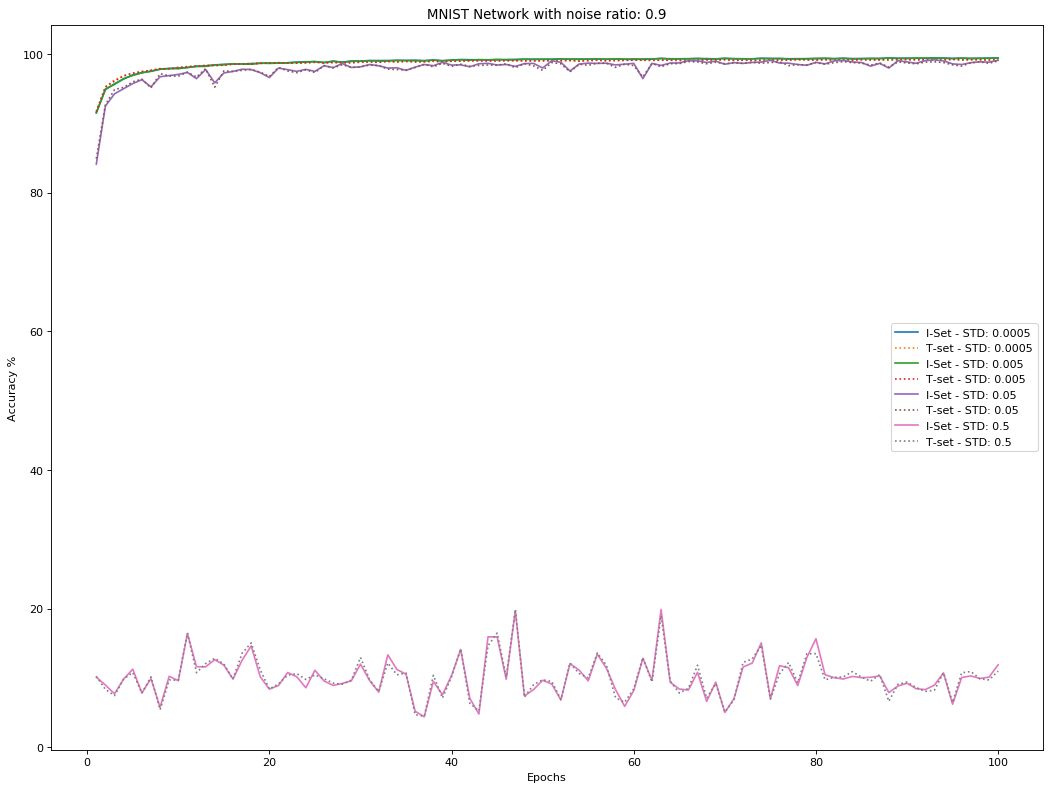

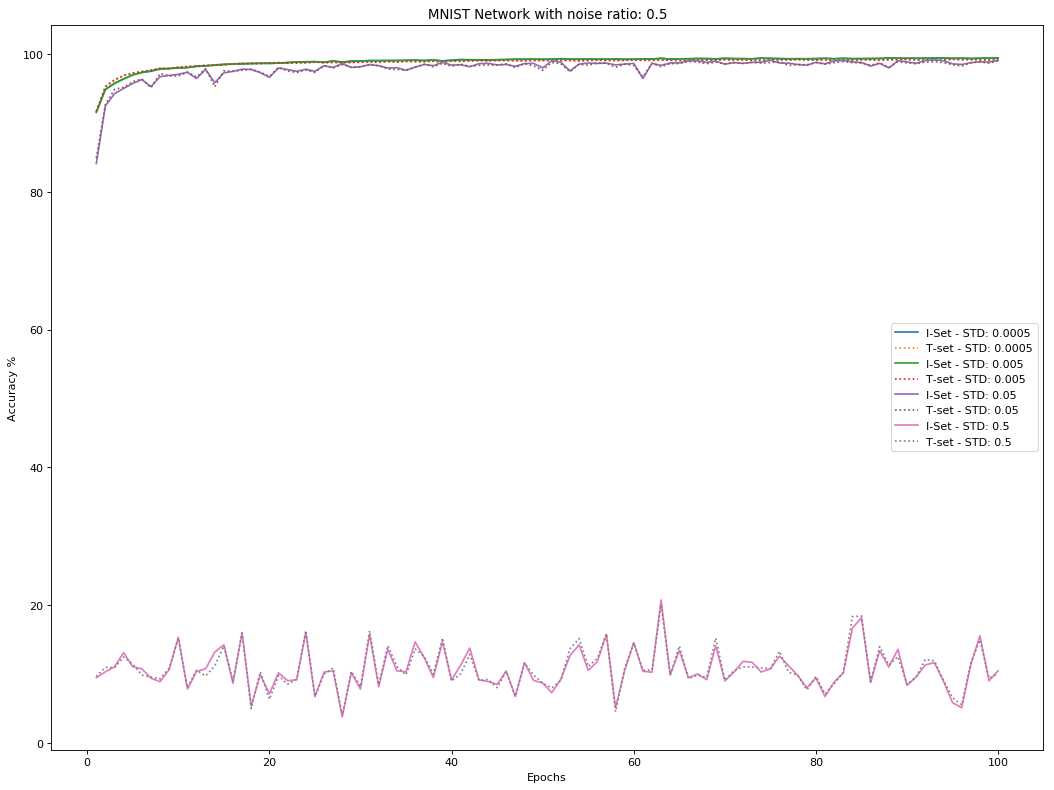

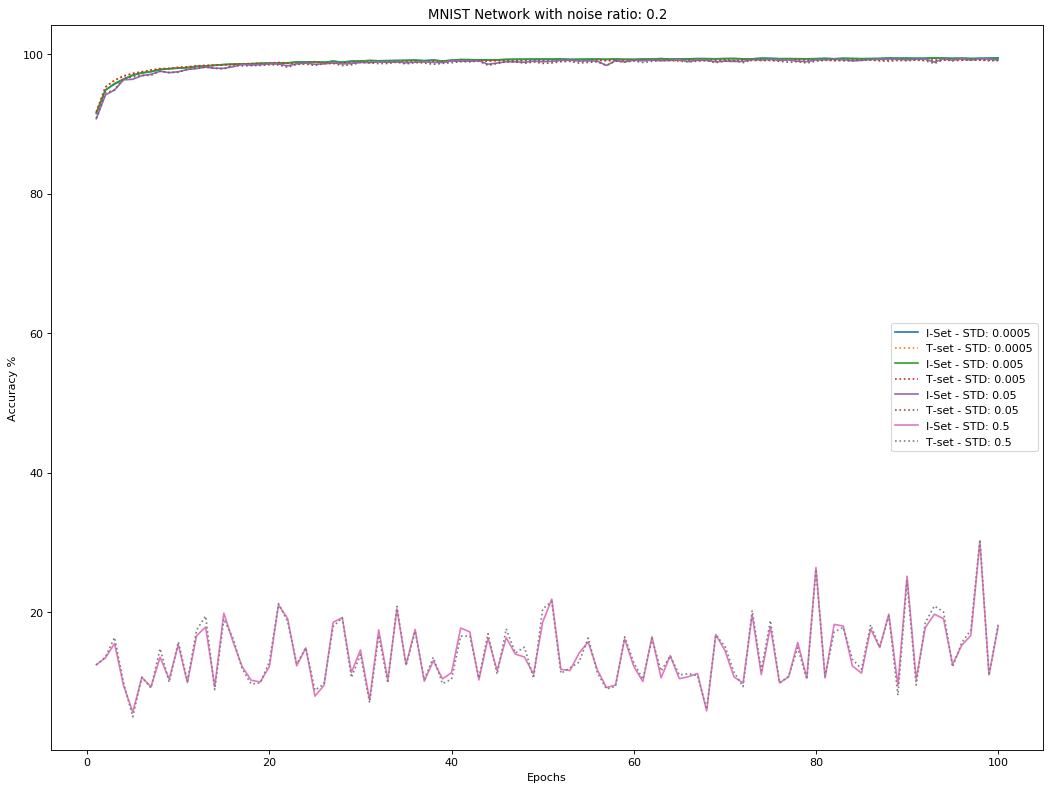

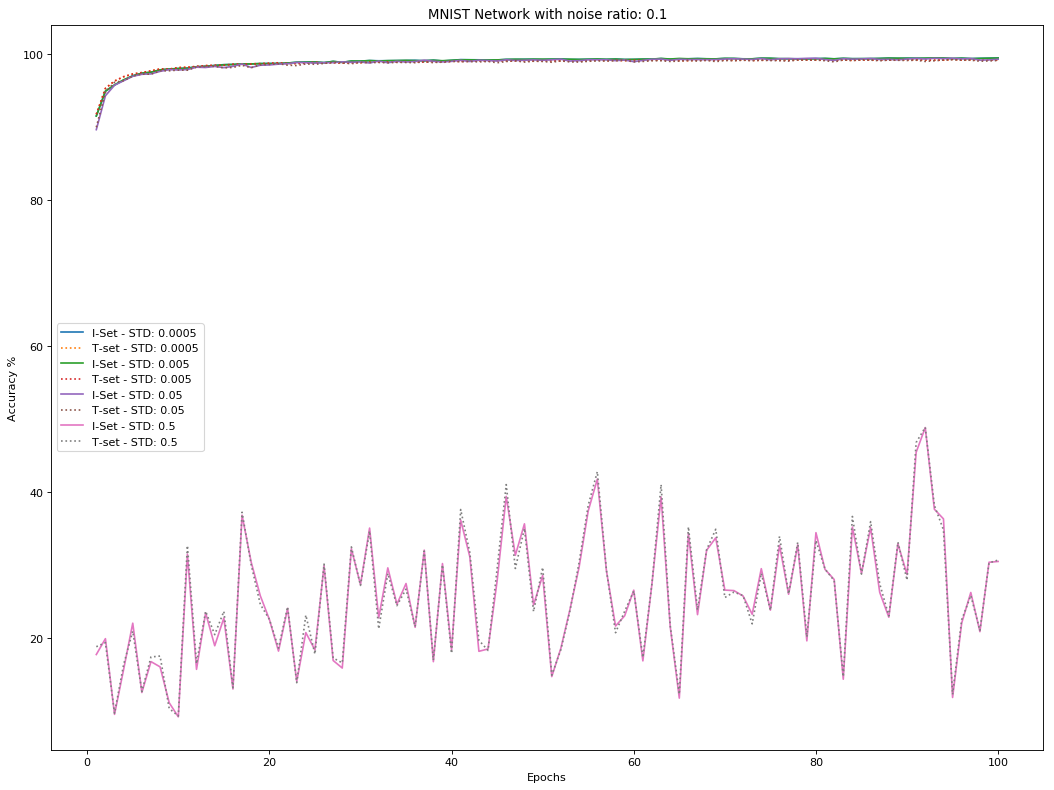

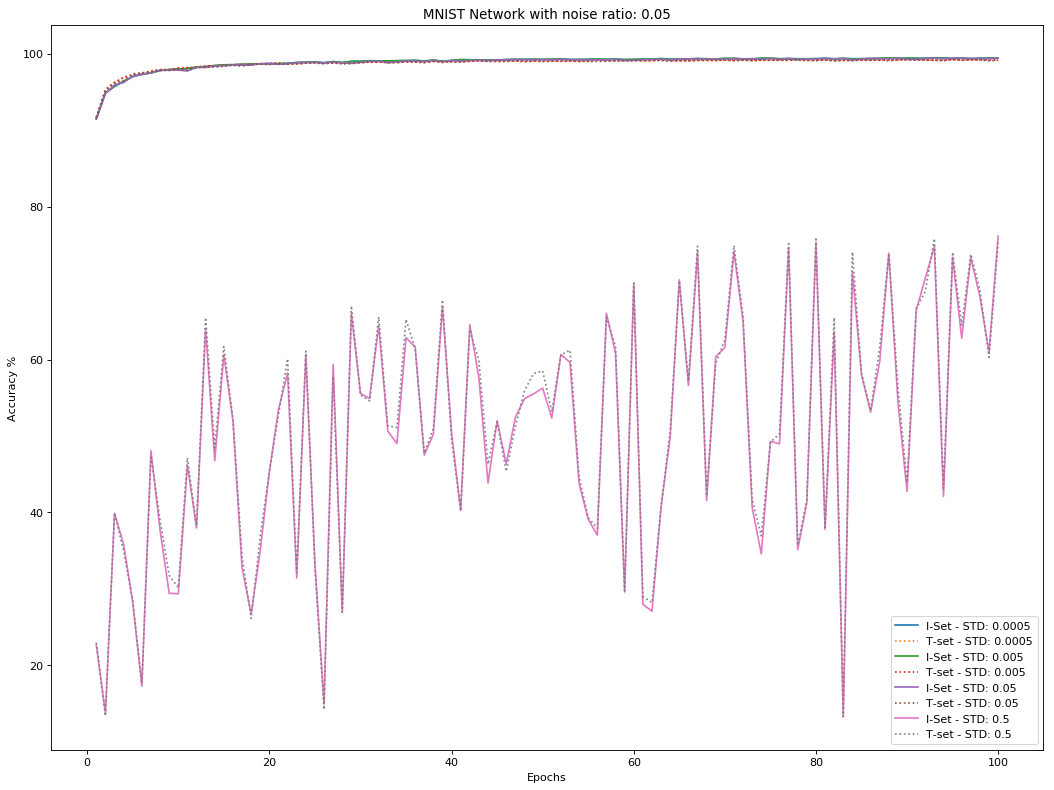

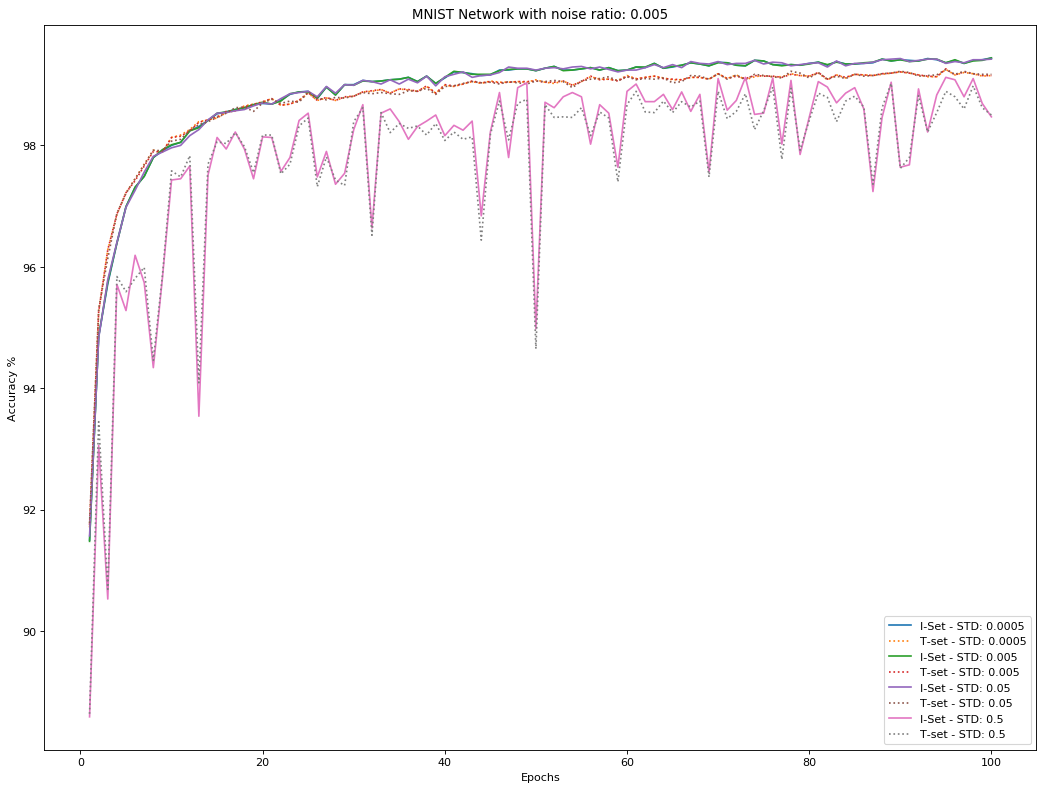

<Figure size 1280x960 with 0 Axes>

In [3]:
from __future__ import division
import os
import glob
import shutil
import multiprocessing
import numpy as np
import csv
import matplotlib.pyplot as plt
import glob
from math import ceil

NOISE_RATIO = ['0.9', '0.5', '0.2', '0.1', '0.05', '0.005']
STANDARD_DEV = ['0.0005','0.005','0.05', '0.5']
base_dir = 'saved_models/las-mnist-100-'

total_figs = len(STANDARD_DEV) * len(NOISE_RATIO)
fig_col, fig_row, fig_index = 2, ceil(total_figs/2), 1
epochs = np.arange(1,101)

plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')

for noise in NOISE_RATIO :
    for std in STANDARD_DEV :
        curr_dir = base_dir + noise + '-' + std + '/'
        files = glob.glob(curr_dir + 'run-log-*copy.txt')
        files = sorted(files)
        for filename in files :
            integrity_set = []
            test_set = []
            with open(filename,'rb') as f :
                #print "Reading files " + filename
                reader = csv.reader(f)
                for row in reader:
                    test_set.append(float(row[0]))
                    integrity_set.append(float(row[1]))
            #plt.subplot(fig_row,fig_col,fig_index)
            plt.plot(epochs,integrity_set,label="I-Set - STD: " + std,linestyle = "-")
            plt.plot(epochs,test_set, label="T-set - STD: " + std, linestyle = ":")
            #plt.legend(loc='lower right', frameon=)
    
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy %")
            #plt.title("Network with std: "+ std + ", and noise ratio: " + noise)
    plt.title("MNIST Network with noise ratio: " + noise)
            #fig_index += 1
    #plt.subplots_adjust(hspace=0.8)
    plt.show()
    plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
    plt.clf()


# Checking Ranges of values for CIFAR-10
### ('min is: ', -0.5599677521993149)
### ('max is: ', 0.494407323993612)

In [80]:
from __future__ import division
import numpy as np
import os
import glob

params_dir = './saved_models/las-ciafar10-100'
params = np.empty(shape = (0,))
min_f = float('inf')
max_f = float('-inf')

files = glob.glob(params_dir + '/model*.npz')
files = sorted(files)
for f_file in files:    
    with np.load(f_file) as f:
          # param_values = [f['arr_%d' % i] for i in range(len(f.files))]
        for i in range(len(f.files)):
            params = np.append(params,f['arr_%d' % i].flatten())
            params_min = np.min(params)
            params_max = np.max(params)
        if min_f > params_min:
                min_f = params_min
        if max_f < params_max:
                max_f = params_max
        prams = np.empty(shape = (0,))

print ("min is: ", params_min)
print ("max is: ", params_max)

('min is: ', -0.5599677521993149)
('max is: ', 0.494407323993612)


# Adding noise to weights

In [117]:
from __future__ import division
import os
import glob
import shutil
import multiprocessing
import numpy as np

NOISE_RATIO = '0.005'    # 0.9, 0.5, 0.2, 0.1, 0.05, 0.005
n_r = float(NOISE_RATIO)
STANDARD_DEV = '0.0005'   # 0.0005, 0.005, 0.05, 0.5
sd = float(STANDARD_DEV)

def copytree(src, dst, symlinks=False, ignore=None):
    for item in os.listdir(src):
        s = os.path.join(src, item)
        d = os.path.join(dst, item)
        if os.path.isdir(s):
            shutil.copytree(s, d, symlinks, ignore)
        else:
            shutil.copy2(s, d)

def add_noise(filename = None, dest_dir = None):
    if filename is None or dest_dir is None:
        print "Error no file name is specified"
        exit(1)
    with np.load(filename) as f:
        params = dict(f)
    
    modified_params = dict()
    
    #print (params['arr_0'].shape)
    for k in params.keys():
        pislook = np.array(params[k])
        #print type(pislook)
        for x in np.nditer(pislook, op_flags=['readwrite']):
            if (np.random.uniform(0.0,1.0)) < n_r:
                noise = np.random.normal(0.0,sd)
                x[...] = x + noise
        modified_params[k] = pislook

    #total_equal = 0
    #total_not_equal = 0
    #for k in params.keys():
    #    total_equal = total_equal + np.sum(params[k] == modified_params[k])
    #    total_not_equal = total_not_equal + np.sum(params[k] != modified_params[k])
    #print (total_equal, total_not_equal)
    
    np.savez(dest_dir + filename[10:-4]+'-copy'+filename[-4:],**modified_params)
    
    #with np.load(filename[:-4]+'-copy'+filename[-4:]) as f:
    #    saved_params = dict(f)
    #total_equal = 0
    #total_not_equal = 0
    #for k in saved_params.keys():
    #    total_equal = total_equal + np.sum(saved_params[k] == modified_params[k])
    #    total_not_equal = total_not_equal + np.sum(saved_params[k] != modified_params[k])
    #print (total_equal, total_not_equal)
    
    
def model_params(dir=None):
    if dir is None:
        print "Error no directory is specified"
        exit(1)
    if os.path.exists('/tmp/zknw/'):
        shutil.rmtree('/tmp/zknw/')
    
    dest_dir = 'saved_models/las-cifar10-100-' + NOISE_RATIO + '-' + STANDARD_DEV + '/'
    
    if os.path.exists(dest_dir):
        shutil.rmtree(dest_dir)
    
    os.mkdir('/tmp/zknw/')
    os.mkdir(dest_dir)
    
    copytree(dir,'/tmp/zknw/')
    files = glob.glob('/tmp/zknw/'+"model*.npz")
    files = sorted(files)
    cnt = 0
    procs = []
    for file_name in files:
        #if cnt < 1:
        if cnt < len(files):
            #proc = multiprocessing.Process(target = h5py_visit_file, args = (file_name,))
            #procs.append(proc)
            add_noise(file_name,dest_dir)
        else:
            break
        cnt = cnt + 1
    
    #for i in range(len(procs)):
     #   procs[i].start()
    
   # for i in range(len(procs)):
    #    procs[i].join()
model_params('./saved_models/las-cifar10-100')

# Graphs for Cifar 10

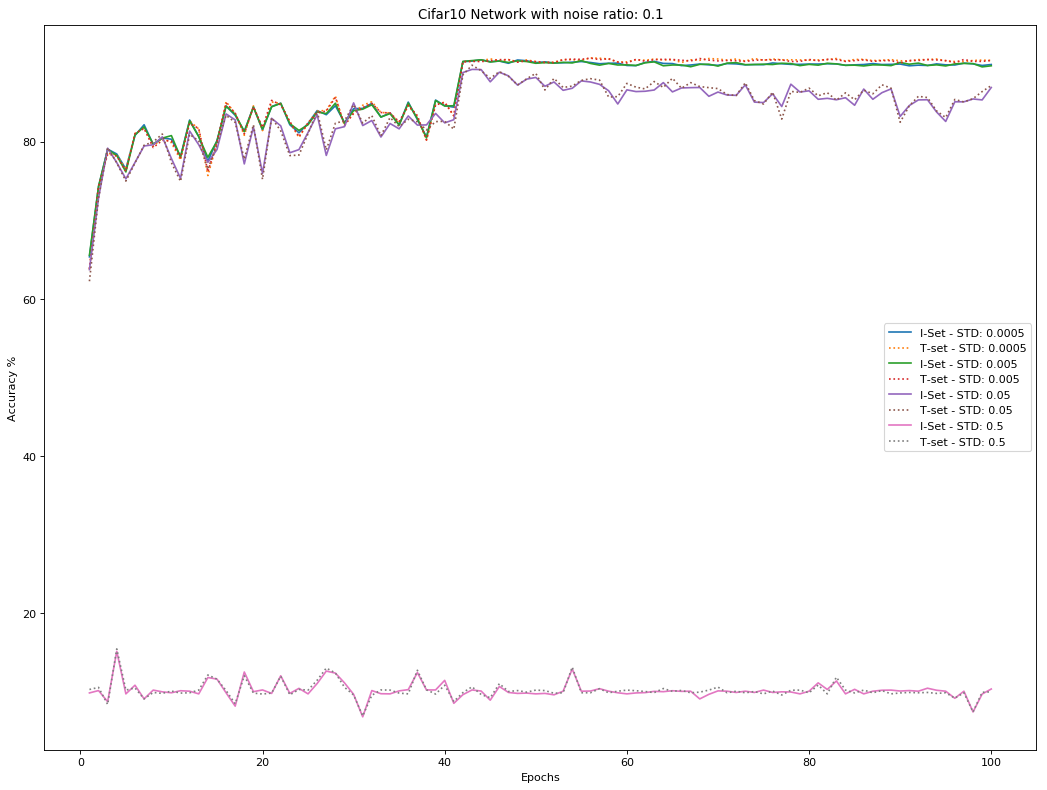

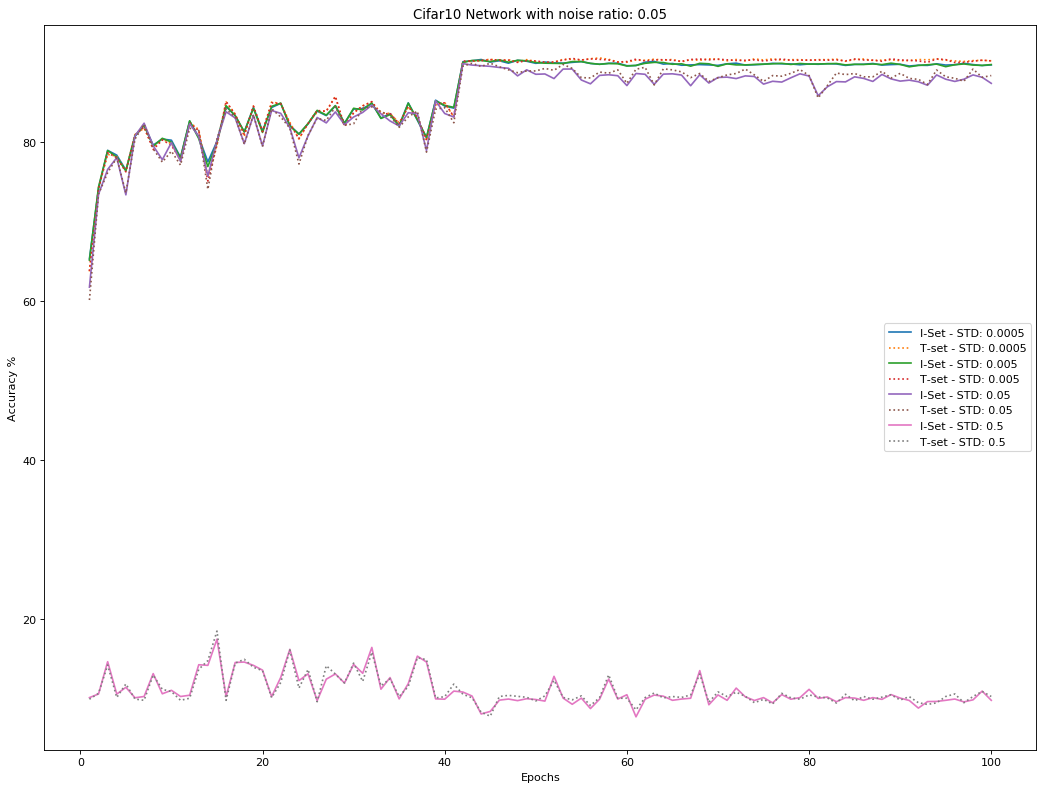

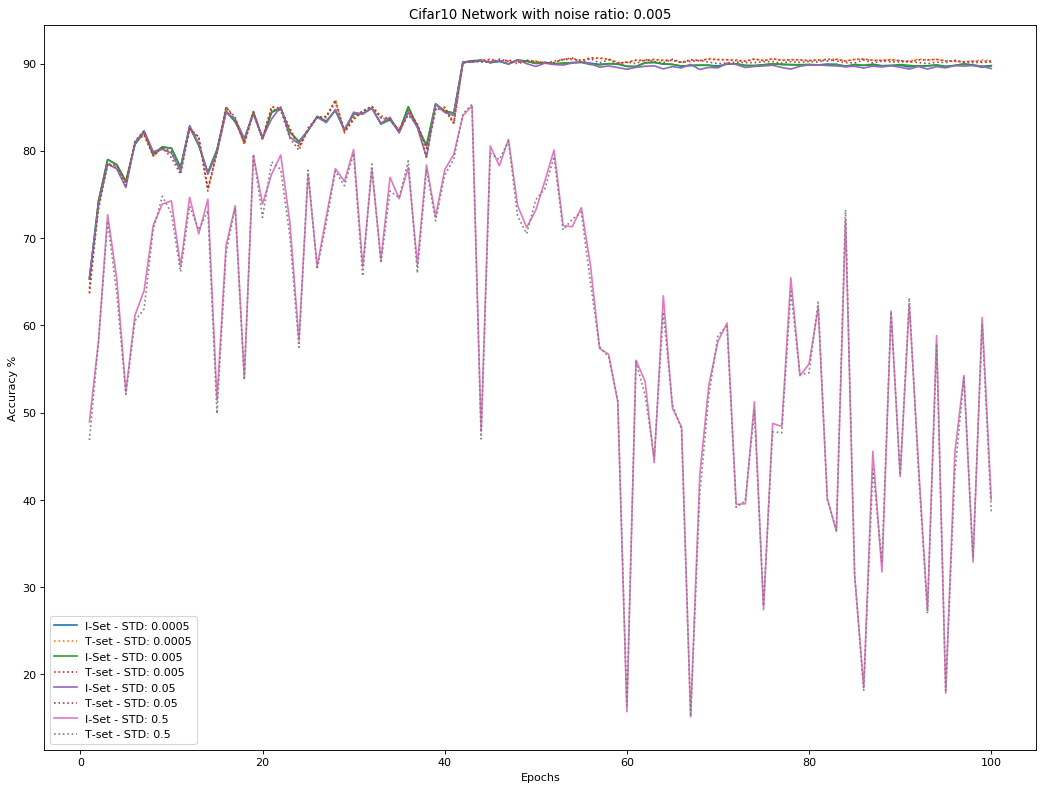

<Figure size 1280x960 with 0 Axes>

In [7]:
from __future__ import division
import os
import glob
import shutil
import multiprocessing
import numpy as np
import csv
import matplotlib.pyplot as plt
import glob
from math import ceil

NOISE_RATIO = ['0.1','0.05', '0.005']
STANDARD_DEV = ['0.0005','0.005','0.05', '0.5']
base_dir = 'saved_models/las-cifar10-100-'

total_figs = len(STANDARD_DEV) * len(NOISE_RATIO)
fig_col, fig_row, fig_index = 2, ceil(total_figs/2), 1
epochs = np.arange(1,101)

plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')

for noise in NOISE_RATIO :
    for std in STANDARD_DEV :
        curr_dir = base_dir + noise + '-' + std + '/'
        files = glob.glob(curr_dir + 'run-log-*copy.txt')
        files = sorted(files)
        for filename in files :
            integrity_set = []
            test_set = []
            with open(filename,'rb') as f :
                #print "Reading files " + filename
                reader = csv.reader(f)
                for row in reader:
                    test_set.append(float(row[0]))
                    integrity_set.append(float(row[1]))
            #plt.subplot(fig_row,fig_col,fig_index)
            plt.plot(epochs,integrity_set,label="I-Set - STD: " + std,linestyle = "-")
            plt.plot(epochs,test_set, label="T-set - STD: " + std, linestyle = ":")
            #plt.legend(loc='lower right', frameon=)
    
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy %")
            #plt.title("Network with std: "+ std + ", and noise ratio: " + noise)
    plt.title("Cifar10 Network with noise ratio: " + noise)
            #fig_index += 1
    #plt.subplots_adjust(hspace=0.8)
    plt.show()
    plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
    plt.clf()
